In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_1=pd.read_csv('solar_test.csv')
df_2=pd.read_csv('solar_train2.csv')


In [3]:
df_2.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,11/9/2016 12:00:00 AM,10:55:01,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00


# Tiempo Unix o Tiempo POSIX es un sistema para la descripción de instantes de tiempo: se define como la cantidad de segundos transcurridos desde la medianoche UTC del 1 de enero de 1970, sin contar segundos intercalares.

# Data: cuando se toma la medicion.

# Time: Hora de la medición



Radiation: Radiación solar en watts por metro^2
Temperature: Temperatura en grados Fahrenheit
Humidity: Humedad en %
Pressure: Presión atmosférica en mm de Hg
WindDirection(degrees): Dirección del viento en grados
Speed: Velocidad del viento en millas por hora
Sunrise/sunset: Salida-Puesta del Sol (horario de Hawaii)
UNIXTime: TimeStamp (segundos desde 01-01-1970)
Data: Fecha
Time: Hora

In [4]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24514 entries, 0 to 24513
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                24514 non-null  int64  
 1   Data                    24514 non-null  object 
 2   Time                    24514 non-null  object 
 3   Radiation               24514 non-null  float64
 4   Temperature             24514 non-null  int64  
 5   Pressure                24514 non-null  float64
 6   Humidity                24514 non-null  int64  
 7   WindDirection(Degrees)  24514 non-null  float64
 8   Speed                   24514 non-null  float64
 9   TimeSunRise             24514 non-null  object 
 10  TimeSunSet              24514 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.1+ MB


In [5]:
def filter_numeric_columns(input_df):
    numeric_columns = input_df.select_dtypes(include=['int', 'float'])
    
    numeric_df = input_df[numeric_columns.columns]
    
    return numeric_df

In [6]:
df_numeric= filter_numeric_columns(df_2)

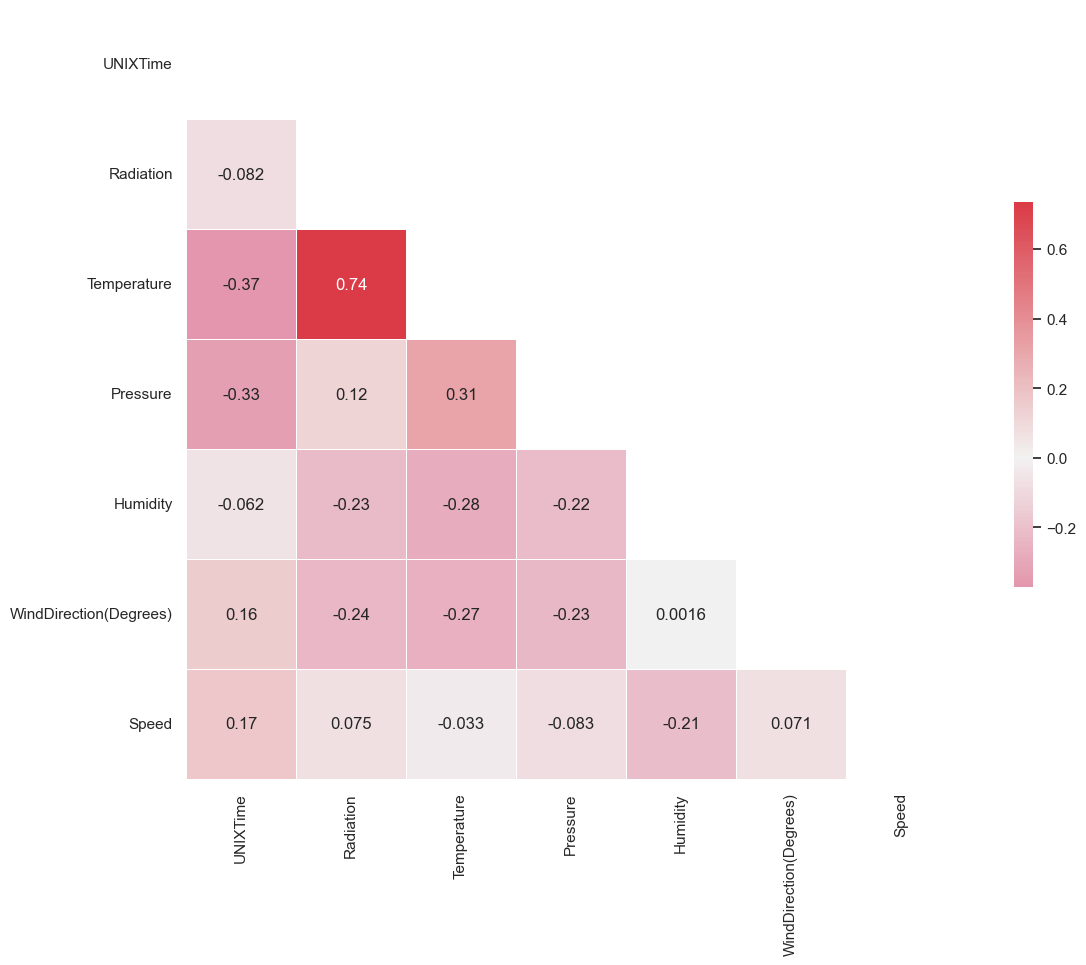

In [7]:
import pylab as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df_numeric.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df_numeric.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [8]:
X=df_numeric.drop(columns='Temperature',axis=1)
y=df_numeric.Temperature

In [9]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split as tts

In [10]:
X_train,X_test,y_train,y_test=tts(X,y,
                                  train_size=80,
                                  test_size=20)
                                

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 6), (20, 6), (80,), (20,))

In [11]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()
linreg.fit(X_train, y_train) 
linreg.fit(X_test, y_test) 


LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error as mse  
y_pred = linreg.predict(X_test) 

mse(y_test, y_pred,squared=False)

3.222970158828395

In [20]:
from sklearn.metrics import mean_squared_error as msle  
y_pred = linreg.predict(X_test) 

msle(y_test, y_pred,squared=True)

10.387536644698331

In [21]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

2.629461414557949

In [15]:
from sklearn.metrics import accuracy_score


In [16]:
y_pred = linreg.predict(X_test) 
y_pred_logreg = linreg.predict(X_test)  

In [17]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

R-squared: 0.7000206008317571


In [19]:
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print('Training Accuracy:', train_accuracy)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets